In [32]:
from src.lib.FileIOUtils import LoadTableFromFile, ReadFasta
from src.lib.CreateDBG import CreateKmersFromReads
from src.lib.DeBruijnGraph import GraphNode
from src.lib import DeBruijnGraph

In [34]:
dbg = LoadTableFromFile('../analysis/kmer_22/DeBruijnGraph_kmer22.json',parse_json=True)

In [36]:
total_edge_count = 0
for key in dbg:
    total_edge_count += len(dbg[key].next)

In [8]:
total_edge_count

6808920

In [39]:
reads = ReadFasta('../data/READS.fasta')

In [40]:
len(reads)

124520

In [41]:
total_read_length = 0
for key in reads:
    total_read_length += len(reads[key])

In [42]:
kmers = CreateKmersFromReads(reads, 22)

In [39]:
len(kmers)

13221684

In [44]:
possible_edges = total_read_length - (len(reads)*21)

In [45]:
possible_edges/ total_edge_count

1.9599253722272145

In [46]:
import numpy as np

In [47]:
km, edges = np.unique(kmers, return_counts = True)

In [52]:
edge_hist = []
for key in dbg:
    edge_hist += [len(dbg[key].next)]

In [54]:
before_corr_hist = np.histogram(edges, bins = 200)
after_corr_hist = np.histogram(edge_hist, bins=200)

In [56]:
from matplotlib import pyplot as plt

(array([4.34316e+05, 9.60200e+04, 2.95520e+04, 1.11510e+04, 6.98300e+03,
        4.26700e+03, 3.88700e+03, 2.18300e+03, 1.65700e+03, 1.35400e+03,
        1.15000e+03, 1.16900e+03, 8.11000e+02, 8.12000e+02, 7.03000e+02,
        5.83000e+02, 6.80000e+02, 6.25000e+02, 5.38000e+02, 5.61000e+02,
        4.13000e+02, 3.32000e+02, 2.66000e+02, 1.82000e+02, 2.28000e+02,
        1.88000e+02, 9.10000e+01, 9.80000e+01, 8.60000e+01, 5.00000e+01,
        5.50000e+01, 5.20000e+01, 1.42000e+02, 1.41000e+02, 5.20000e+01,
        7.80000e+01, 1.13000e+02, 1.30000e+02, 8.60000e+01, 8.70000e+01,
        9.80000e+01, 4.50000e+01, 6.40000e+01, 7.10000e+01, 4.90000e+01,
        5.80000e+01, 5.30000e+01, 4.40000e+01, 3.40000e+01, 2.30000e+01,
        1.40000e+01, 6.00000e+00, 4.00000e+00, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

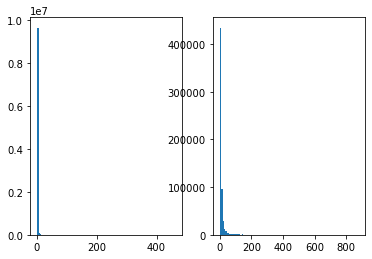

In [67]:
fig, ax = plt.subplots(1,2)
ax[0].hist(edges, bins = 100)
ax[1].hist(edge_hist, bins=100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F2365EF70>,
      dtype=object)